In [1]:
import pandas as pd
import numpy as np

In [2]:
!gdown 12G_J8gBel8MpspdXJruZuuMvyrm9upNb
!gdown 1-zjfYbZm8JC4wog9tG4zltMPuZM6p9_A

!gdown 1p03Ltdto8XoOdu14YlcQjzE-360SyI89
!gdown 1mNcWfaEW19ql8WCih6HiqRryCcjFUUqx

Downloading...
From: https://drive.google.com/uc?id=12G_J8gBel8MpspdXJruZuuMvyrm9upNb
To: /content/X_test.csv
100% 51.7k/51.7k [00:00<00:00, 58.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-zjfYbZm8JC4wog9tG4zltMPuZM6p9_A
To: /content/X_train.csv
100% 154k/154k [00:00<00:00, 82.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1p03Ltdto8XoOdu14YlcQjzE-360SyI89
To: /content/y_test.csv
100% 743/743 [00:00<00:00, 1.32MB/s]
Downloading...
From: https://drive.google.com/uc?id=1mNcWfaEW19ql8WCih6HiqRryCcjFUUqx
To: /content/y_train.csv
100% 2.21k/2.21k [00:00<00:00, 3.62MB/s]


In [3]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [4]:
y_train.value_counts()

Target
0         924
1         178
dtype: int64

In [5]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()

X_sm, y_sm = smt.fit_resample(X_train, y_train)
print(y_sm.value_counts())

Target
0         924
1         924
dtype: int64


In [6]:
X_sm.shape

(1848, 36)

In [7]:
X_sm.head()

,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,36,1174,3,4,0.233871,1,0,99,3,2,...,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,21,546,5,1,0.127479,3,1,97,3,1,...,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,43,422,1,3,0.151584,4,0,33,3,2,...,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,42,188,29,3,0.127479,2,1,56,1,2,...,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,35,992,1,3,0.127479,4,1,68,2,1,...,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [8]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state= 42, )

In [9]:
tree_clf.fit(X_sm, y_sm)

DecisionTreeClassifier(random_state=42)

In [10]:
y_pred = tree_clf.predict(X_test)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [11]:
tree_clf.score(X_test, y_test)

0.7744565217391305

In [12]:
tree_clf.score(X_sm, y_sm)

1.0

In [2]:
from sklearn.model_selection import KFold, cross_validate, StratifiedKFold

In [ ]:
StratifiedKFold()

In [14]:
kfold = KFold(n_splits = 10)

In [15]:
cv_acc_results = cross_validate(tree_clf, X_sm, y_sm, scoring='accuracy', cv = kfold, return_train_score = True  )

In [16]:
cv_acc_results['train_score'].mean()

1.0

In [17]:
cv_acc_results['test_score'].mean()

0.8237132784958872

In [18]:
from sklearn.tree import plot_tree

In [19]:
import matplotlib.pyplot as plt

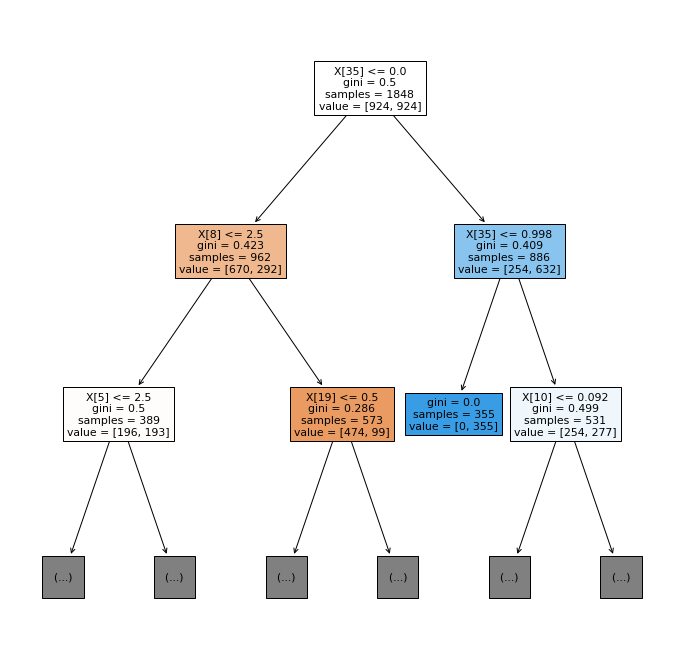

In [21]:
plt.figure(figsize = (12, 12))
plot_tree(tree_clf, max_depth = 2, filled = True)
plt.show();

In [22]:
tree_clf_new = DecisionTreeClassifier(random_state= 42, max_depth = 7)
tree_clf_new.fit(X_sm, y_sm)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [23]:
tree_clf_new.score(X_test, y_test)

0.8125

In [24]:
tree_clf_new.score(X_sm, y_sm)

0.9285714285714286

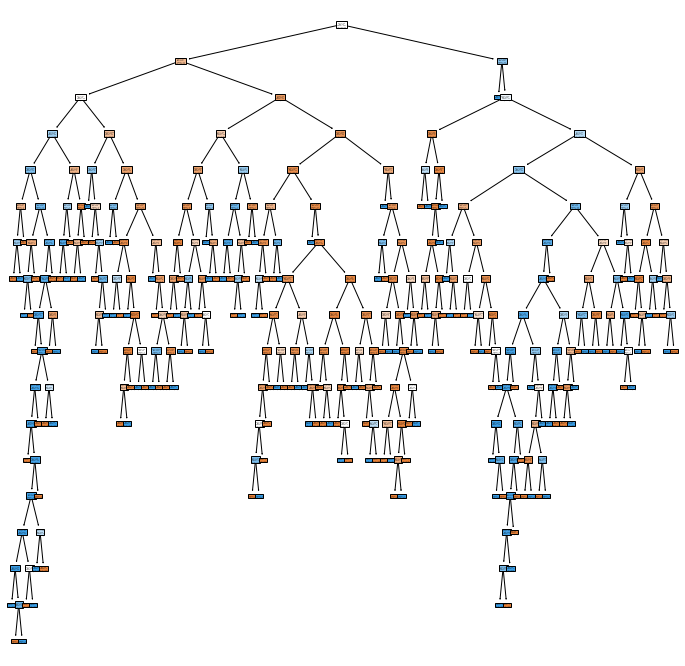

In [25]:
plt.figure(figsize = (12, 12))
plot_tree(tree_clf, filled = True)
plt.show();

In [27]:
tree_clf.tree_.max_depth

17

In [29]:
depths = [3,4,5,6,7,9,11,13,15]

for depth in depths:
    tree_clf = DecisionTreeClassifier(random_state=42, max_depth = depth)

    cv_acc_results = cross_validate(tree_clf, X_sm, y_sm, cv = kfold, scoring = 'f1', return_train_score = True)

    print(f"K-Fold for depth:{depth} Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
    # print(f"K-Fold for depth: {depth} Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")
    print('***************')

K-Fold for depth:3 Accuracy Mean: Train: 78.78954035230923 Validation: 60.21949190440116
***************
K-Fold for depth:4 Accuracy Mean: Train: 83.13304979642953 Validation: 60.86447986505452
***************
K-Fold for depth:5 Accuracy Mean: Train: 86.75159726089763 Validation: 60.786079395996786
***************
K-Fold for depth:6 Accuracy Mean: Train: 89.68061750068024 Validation: 60.68829194882864
***************
K-Fold for depth:7 Accuracy Mean: Train: 92.68821149892999 Validation: 61.52505260126364
***************
K-Fold for depth:9 Accuracy Mean: Train: 96.80185873186537 Validation: 61.305349167161204
***************
K-Fold for depth:11 Accuracy Mean: Train: 99.01913409977908 Validation: 62.233703402564736
***************
K-Fold for depth:13 Accuracy Mean: Train: 99.73116062999236 Validation: 61.964997973271686
***************
K-Fold for depth:15 Accuracy Mean: Train: 99.90778021331825 Validation: 60.85200549750724
***************


In [32]:
tree_clf = DecisionTreeClassifier(random_state=42, max_depth = 5)
tree_clf=tree_clf.fit(X_sm, y_sm)

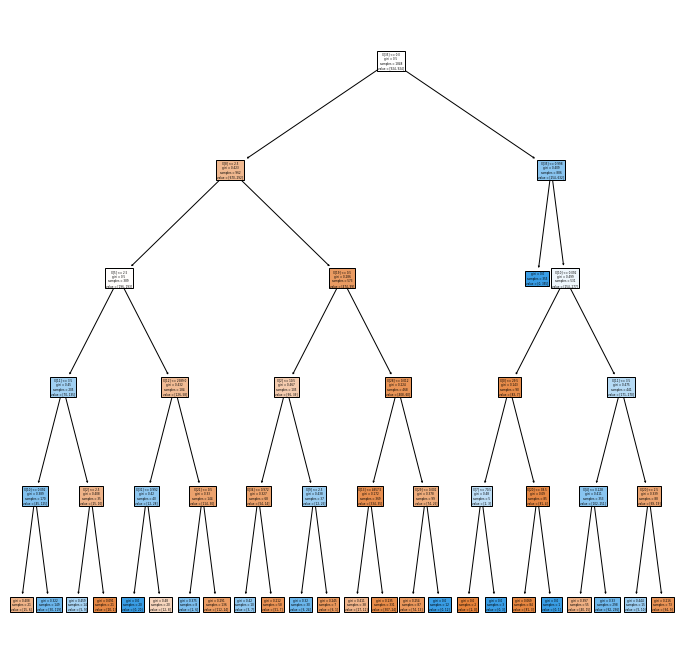

In [33]:
plt.figure(figsize = (12, 12))
plot_tree(tree_clf, filled = True)
plt.show();

In [34]:
tree_clf.feature_importances_

array([0.00526256, 0.        , 0.03012458, 0.        , 0.04562451,
       0.04165921, 0.        , 0.00437395, 0.08831184, 0.00893367,
       0.09547717, 0.08432873, 0.02758284, 0.00584873, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01849201,
       0.0167409 , 0.0090588 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00707343, 0.02780885,
       0.        , 0.01312186, 0.        , 0.        , 0.01043361,
       0.45974274])